In [1]:
#!pip install nltk
#!pip install pymystem3
!python -m spacy download ru_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.4/513.4 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 395.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 20.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
from collections import Counter # необходимые импорты

from pymystem3 import Mystem
mystem = Mystem()

import re

import nltk

import pandas as pd

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [3]:
import spacy
nlp_rus = spacy.load("ru_core_news_lg")

In [ ]:
from google.colab import drive # для подключения гугл-диска
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
add_stop_ne = []

with open('/content/drive/MyDrive/stop_ru (project).txt', 'r', encoding='utf-8') as f: #использую этот список для удаления стоп-слов
    for i in f:
        add_stop_ne.append(i.strip()) #strip
print(len(add_stop_ne))
print(add_stop_ne)

552
['и', 'в', 'во', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впрочем', 'хорошо', 'свою', 'этой', 'перед', '

# **Отрицательные отзывы**


In [ ]:
with open('/content/drive/MyDrive/all_reviews_bad_joined.txt', 'r', encoding = 'utf-8') as txt_bad: #encoding='cp1251'
    read_txt_bad = txt_bad.read()

In [ ]:
len(read_txt_bad) # строка 3856815

3856815

In [5]:
def normalization(read_txt_bad): # препроцессинг
    res_bad = read_txt_bad.lower()
    res_bad = res_bad.replace('-- предварительный просмотр --', ' ') # удаляем мусор
    res_bad = res_bad.replace('подтвердите просмотр фильма', ' ')
    res_bad = res_bad.replace('ответьте на несколько простых вопросов о фильме для подтверждения его\n                            просмотра вами', ' ')
    res_bad = re.sub('[0-9]+', 'num', res_bad) # заменяем все числа
    res_bad = res_bad.replace('num из num', '')
    res_bad = res_bad.replace('num', '')
    res_bad = re.sub('\\n', ' ', res_bad)
    res_lem = mystem.lemmatize(res_bad)
    res = re.sub(r'\W', ' ', str(res_lem)).split() # деление на токены
    res_clean =  [usword for usword in list(res) if usword not in add_stop_ne]
    result_bad = ' '.join(res_clean)
    return result_bad

In [ ]:
cleaned_bad = normalization(read_txt_bad) # str 2670261, list 334596

In [ ]:
len(cleaned_bad)

2670261

In [ ]:
nlp_rus.max_length = len(cleaned_bad) + 100 #увеличиваем длину во избежание ошибки при выделении NER

In [ ]:
doc_bad = nlp_rus(cleaned_bad) #выделяем именованные сущности
ents=[]
for ent in doc_bad.ents:
    ents.append(ent.text)
ner_ents = set(ents) #2946
print(len(ner_ents))

2946


In [ ]:
ner_ents

{'марио',
 'катана крок',
 'ричард гир эмма стоун',
 'рэй кануть',
 'давид',
 'fox',
 'бесконечный дом',
 'sony pictures',
 'момо апа',
 'иван реон',
 'настя кристина',
 'бэтмена робин',
 'азай джао ксошный',
 'мила кунис',
 'харли сладкий',
 'миртлы уилсон',
 'база лурман',
 'арлин',
 'киоши',
 'audi',
 'катана слипкнот',
 'джаред',
 'слизнорт',
 'marvel studios',
 'роман гэтсби',
 'ироха шон тоуб',
 'пихор',
 'иваново',
 'адриано челентано',
 'слы че',
 'суперхиро мувь',
 'квин джокер',
 'мэтт бомер',
 'наоми уоттс',
 'эль дьябло крок',
 'мустафа фон',
 'гэтсби роман',
 'крокк',
 'фаррелл кен герой фаррелл',
 'близзард',
 'холли берри джерард батлер',
 'джеймс ганн',
 'гэтсби дом',
 'юэль кинаманный',
 'теодор шапиро',
 'тина тина',
 'робин гуд',
 'луи армстронг',
 'азуля',
 'катана джокер',
 'фрэнсис фицджеральд',
 'рокки д сцена кен',
 'кейт маккиннон',
 'куинни гольдштейн',
 'харлин джай корень',
 'куини тина',
 'гослинг робби',
 'николсон джокер леджер',
 'анна каренина',
 'кк',


In [ ]:
bad_texts = [] # убираем из корпуса именованные сущности

for k in cleaned_bad.split():
    if k not in ner_ents:
        bad_texts.append(k)
len(bad_texts) #318577

318577

In [ ]:
bad_analyzed = mystem.analyze(' '.join(bad_texts)) # морфологический анализ
bad_analyzed

[{'analysis': [{'lex': 'форма', 'wt': 1, 'gr': 'S,жен,неод=им,ед'}],
  'text': 'форма'},
 {'text': ' '},
 {'analysis': [{'lex': 'хороший',
    'wt': 1,
    'gr': 'A=(вин,ед,полн,муж,неод|им,ед,полн,муж)'}],
  'text': 'хороший'},
 {'text': ' '},
 {'analysis': [{'lex': 'выполнять', 'wt': 1, 'gr': 'V,пе=инф,несов'}],
  'text': 'выполнять'},
 {'text': ' '},
 {'analysis': [{'lex': 'аутентичный',
    'wt': 1,
    'gr': 'A=(вин,ед,полн,муж,неод|им,ед,полн,муж)'}],
  'text': 'аутентичный'},
 {'text': ' '},
 {'analysis': [{'lex': 'стилистически', 'wt': 0.9983353683, 'gr': 'ADV='}],
  'text': 'стилистически'},
 {'text': ' '},
 {'analysis': [{'lex': 'верный',
    'wt': 1,
    'gr': 'A=(вин,ед,полн,муж,неод|им,ед,полн,муж)'}],
  'text': 'верный'},
 {'text': ' '},
 {'analysis': [{'lex': 'содержание',
    'wt': 1,
    'gr': 'S,сред,неод=(вин,ед|им,ед)'}],
  'text': 'содержание'},
 {'text': ' '},
 {'analysis': [{'lex': 'глубоко', 'wt': 0.9890724134, 'gr': 'ADV='}],
  'text': 'глубоко'},
 {'text': ' '

In [ ]:
just_adj = [] # выделяем только прилагательные
for x in bad_analyzed:
    try:
        if 'analysis' in x and x['analysis'][0]['gr'].startswith('A='):
            just_adj.append(x['text'])
    except:
        pass

In [ ]:
len(just_adj) # 47801

47801

In [ ]:
freq_adj = Counter(just_adj) # считаем частоту прилагательных
freq_adj

Counter({'хороший': 1130,
         'аутентичный': 3,
         'верный': 29,
         'асоциальный': 1,
         'деструктивный': 3,
         'художественный': 57,
         'глубинный': 8,
         'современный': 216,
         'женский': 166,
         'воинственный': 3,
         'мировой': 79,
         'долгий': 49,
         'эмансипированный': 2,
         'обратный': 19,
         'целый': 149,
         'радикальный': 9,
         'способный': 147,
         'большой': 538,
         'ценный': 12,
         'расходный': 3,
         'эволюционный': 1,
         'близкий': 51,
         'золотой': 79,
         'разный': 150,
         'внутренний': 85,
         'должный': 585,
         'новый': 554,
         'личный': 75,
         'нужный': 255,
         'достижимый': 2,
         'материнский': 1,
         'горизонтальный': 1,
         'иерархический': 1,
         'патриархальный': 5,
         'самовлюбленный': 7,
         'неправый': 4,
         'материалистический': 1,
         'сокрытый': 1,


In [ ]:
freqadj_b = freq_adj.most_common(30) # выделяем 30 самых частотных прилагательных
freqadj_b

[('хороший', 1130),
 ('главный', 1102),
 ('плохой', 654),
 ('должный', 585),
 ('новый', 554),
 ('большой', 538),
 ('общий', 498),
 ('интересный', 482),
 ('актерский', 450),
 ('красивый', 445),
 ('единственный', 434),
 ('полный', 372),
 ('последний', 355),
 ('серый', 336),
 ('смешной', 310),
 ('похожий', 304),
 ('великий', 297),
 ('оригинальный', 288),
 ('ужасный', 284),
 ('нужный', 255),
 ('сюжетный', 255),
 ('глупый', 253),
 ('скучный', 245),
 ('подобный', 244),
 ('огромный', 242),
 ('неплохой', 229),
 ('яркий', 228),
 ('основной', 227),
 ('современный', 216),
 ('тупой', 215)]

In [ ]:
 list_adb_freq = [] # для последующего сентимент анализа

for n in freqadj_b:
  list_adb_freq.append(n[0])
list_adb_freq

['хороший',
 'главный',
 'плохой',
 'должный',
 'новый',
 'большой',
 'общий',
 'интересный',
 'актерский',
 'красивый',
 'единственный',
 'полный',
 'последний',
 'серый',
 'смешной',
 'похожий',
 'великий',
 'оригинальный',
 'ужасный',
 'нужный',
 'сюжетный',
 'глупый',
 'скучный',
 'подобный',
 'огромный',
 'неплохой',
 'яркий',
 'основной',
 'современный',
 'тупой']

In [ ]:
freq_trigramms = Counter(nltk.trigrams(bad_texts)) # выделяем триграммы
freq_trigramms

Counter({('форма', 'хороший', 'выполнять'): 1,
         ('хороший', 'выполнять', 'аутентичный'): 1,
         ('выполнять', 'аутентичный', 'стилистически'): 1,
         ('аутентичный', 'стилистически', 'верный'): 1,
         ('стилистически', 'верный', 'содержание'): 1,
         ('верный', 'содержание', 'глубоко'): 1,
         ('содержание', 'глубоко', 'асоциальный'): 1,
         ('глубоко', 'асоциальный', 'деструктивный'): 1,
         ('асоциальный', 'деструктивный', 'начало'): 1,
         ('деструктивный', 'начало', 'конец'): 1,
         ('начало', 'конец', 'фильм'): 5,
         ('конец', 'фильм', 'художественный'): 1,
         ('фильм', 'художественный', 'плевок'): 1,
         ('художественный', 'плевок', 'подымать'): 1,
         ('плевок', 'подымать', 'глубинный'): 1,
         ('подымать', 'глубинный', 'проблема'): 1,
         ('глубинный', 'проблема', 'современный'): 1,
         ('проблема', 'современный', 'одиночество'): 1,
         ('современный', 'одиночество', 'усугублять'): 1,

In [ ]:
trigrambad = freq_trigramms.most_common(20) # найдем 20 самых частотных триграмм
trigrambad

[(('пятьдесят', 'оттенок', 'серый'), 84),
 (('фильм', 'повелитель', 'стихия'), 45),
 (('преступление', 'де', 'вальд'), 37),
 (('оставлять', 'желать', 'хороший'), 35),
 (('фильм', 'не', 'понравиться'), 33),
 (('не', 'читать', 'книга'), 33),
 (('мультсериал', 'аватар', 'легенда'), 33),
 (('книга', 'не', 'читать'), 30),
 (('вообще', 'не', 'понимать'), 28),
 (('отряд', 'самоубийца', 'не'), 27),
 (('очень', 'страшный', 'кино'), 26),
 (('не', 'оправдывать', 'ожидание'), 25),
 (('персонаж', 'не', 'раскрывать'), 25),
 (('самый', 'начало', 'фильм'), 24),
 (('последний', 'маг', 'воздух'), 24),
 (('не', 'подходить', 'роль'), 23),
 (('не', 'вызывать', 'никакой'), 22),
 (('главный', 'герой', 'не'), 22),
 (('мультфильм', 'аватар', 'легенда'), 22),
 (('фильм', 'оттенок', 'серый'), 22)]

In [ ]:
bad_trigr = [] # для последующего сентимент анализа
for t in trigrambad:
  bad_trigr.append(t[0][0]+ ' '+ t[0][1]+ ' ' + t[0][2])
print(bad_trigr)

['пятьдесят оттенок серый', 'фильм повелитель стихия', 'преступление де вальд', 'оставлять желать хороший', 'фильм не понравиться', 'не читать книга', 'мультсериал аватар легенда', 'книга не читать', 'вообще не понимать', 'отряд самоубийца не', 'очень страшный кино', 'не оправдывать ожидание', 'персонаж не раскрывать', 'самый начало фильм', 'последний маг воздух', 'не подходить роль', 'не вызывать никакой', 'главный герой не', 'мультфильм аватар легенда', 'фильм оттенок серый']


**СЕНТИМЕНТ АНАЛИЗ**

In [20]:
!pip install dostoevsky # библиотека для сентимент анализа

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199774 sha256=6333ada499f910344f1163f2100de65f1280beed4b8a130428d230234e924475
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
#!pip install fasttext-wheel

In [21]:
!python -m dostoevsky download fasttext-social-network-model

In [22]:
# сентимент-анализ текстов на русском
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

In [ ]:
results = model.predict(bad_trigr, k=2) # сентимент анализ триграмм (отрицательные отзывы)
for tri, sentiment in zip(bad_trigr, results):
    print(tri, ':', sentiment)

пятьдесят оттенок серый : {'skip': 0.22816647589206696, 'positive': 0.18714269995689392}
фильм повелитель стихия : {'neutral': 0.9921941161155701, 'positive': 0.09535945951938629}
преступление де вальд : {'neutral': 0.8267217874526978, 'negative': 0.056662432849407196}
оставлять желать хороший : {'neutral': 0.3276783227920532, 'negative': 0.01972912810742855}
фильм не понравиться : {'neutral': 0.771853506565094, 'positive': 0.6859594583511353}
не читать книга : {'neutral': 0.9879562258720398, 'skip': 0.09010298550128937}
мультсериал аватар легенда : {'neutral': 0.9956784844398499, 'skip': 0.013646835461258888}
книга не читать : {'neutral': 0.9926641583442688, 'skip': 0.0695517510175705}
вообще не понимать : {'negative': 0.8439050912857056, 'neutral': 0.5156299471855164}
отряд самоубийца не : {'neutral': 0.9669240117073059, 'negative': 0.08270734548568726}
очень страшный кино : {'negative': 0.2689514458179474, 'positive': 0.16886694729328156}
не оправдывать ожидание : {'neutral': 0.9952

In [ ]:
results_adj = model.predict(just_adj, k=2)
most_negative = [] # # отбираем прилагательные только с отрицательной коннотацией из всего списка прилагательных (отрицательные отзывы)
for s, sentiment in zip(just_adj, results_adj):
  if 'negative' in sentiment:
    most_negative.append([s, sentiment['negative']])

most_negative0 = []
for b in most_negative:
  if b[1] > 0.6 and [b[0], b[1]] not in most_negative0: # отбираем прилагательные с показателем больше 0.6
    most_negative0.append([b[0], b[1]])
most_negative0.sort() #сортировка по алфавиту
most_negative0

[['бедный', 0.607673168182373],
 ['безалкогольный', 0.7057950496673584],
 ['безвредный', 0.9099169969558716],
 ['безжалостный', 0.6370407938957214],
 ['безобидный', 0.9124462008476257],
 ['безрассудный', 0.7490972280502319],
 ['беспристрастный', 0.6370407938957214],
 ['бессмертный', 0.8311530351638794],
 ['бессовестный', 0.9046605229377747],
 ['бесстрастный', 0.8175845146179199],
 ['бесстрашный', 0.9219318628311157],
 ['бесстыдный', 0.9755869507789612],
 ['бесхребетный', 0.754925012588501],
 ['бледнолицый', 0.9099169969558716],
 ['бледный', 0.9924327731132507],
 ['больная', 0.9284188151359558],
 ['больной', 0.8080772161483765],
 ['вредный', 0.6297846436500549],
 ['говнистый', 0.7663036584854126],
 ['грустный', 0.9706977605819702],
 ['дебилоидный', 0.994455099105835],
 ['дебильный', 0.8080772161483765],
 ['дурацки', 0.7186043858528137],
 ['дурацкий', 0.8519628047943115],
 ['европеоидный', 0.8634016513824463],
 ['ехидный', 0.6513648629188538],
 ['жалкий', 0.7981967926025391],
 ['жестокос

In [ ]:
forwdcldadj = [] # список для создания облака слов
for wd in most_negative0:
   forwdcldadj.append(wd[0])
print(forwdcldadj)

['бедный', 'безалкогольный', 'безвредный', 'безжалостный', 'безобидный', 'безрассудный', 'беспристрастный', 'бессмертный', 'бессовестный', 'бесстрастный', 'бесстрашный', 'бесстыдный', 'бесхребетный', 'бледнолицый', 'бледный', 'больная', 'больной', 'вредный', 'говнистый', 'грустный', 'дебилоидный', 'дебильный', 'дурацки', 'дурацкий', 'европеоидный', 'ехидный', 'жалкий', 'жестокосердный', 'ломаный', 'мерзопакостный', 'мужененавистнический', 'надоедливый', 'нелепый', 'ненавистный', 'неопытный', 'неразрывный', 'несерьезный', 'обидный', 'опытный', 'отвратный', 'отстойный', 'отчаянный', 'пвсевдонаучный', 'предсмертный', 'проблематичный', 'развратный', 'садомазохистский', 'скучный', 'смешно', 'страшно', 'стыдный', 'судный', 'суицидальный', 'ужасно', 'ужасный', 'хренов']


In [ ]:
results4 = model.predict(list_adb_freq, k=2) # сентимент анализ униграмм - прилагательные (отрицательные отзывы)
for rslb, sentiment in zip(list_adb_freq, results4):
    print(rslb, ':', sentiment)

хороший : {'positive': 0.9615437984466553, 'skip': 0.0008930459152907133}
главный : {'neutral': 0.993317186832428, 'skip': 0.014513582922518253}
плохой : {'neutral': 0.9284188151359558, 'negative': 0.5544804334640503}
должный : {'neutral': 1.0000100135803223, 'positive': 0.0008930459152907133}
новый : {'neutral': 1.0000100135803223, 'negative': 1.0000003385357559e-05}
большой : {'neutral': 0.9659096002578735, 'skip': 0.0027249858248978853}
общий : {'neutral': 0.9984121918678284, 'skip': 0.006299902219325304}
интересный : {'neutral': 0.8740872144699097, 'positive': 0.7826725244522095}
актерский : {'neutral': 1.0000100135803223, 'negative': 0.0027249858248978853}
красивый : {'positive': 0.9972950220108032, 'neutral': 0.051855459809303284}
единственный : {'neutral': 0.33459946513175964, 'skip': 0.14415885508060455}
полный : {'neutral': 0.9946250915527344, 'positive': 0.017452487722039223}
последний : {'neutral': 1.0000100135803223, 'negative': 0.028446035459637642}
серый : {'neutral': 0.9

**Облако слов**

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
from PIL import Image

In [25]:
import numpy as np

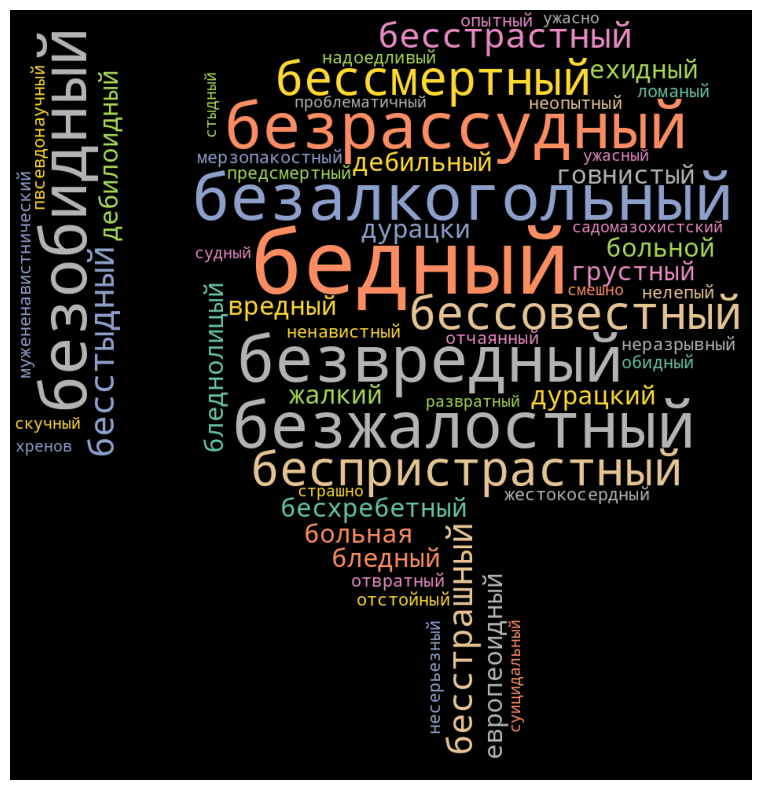

In [ ]:
# Превращаем картинку в маску
#mask = np.array(Image.open('dislike1.png'))
mask = np.array(Image.open('/content/drive/MyDrive/dislike1.png'))

# Генерируем облако слов
wordcloud_adjb = WordCloud(width = 2000,
                      height = 1500,
                      background_color='black',
                      colormap='Set2',
                      mask=mask).generate(', '.join(forwdcldadj))

plt.figure(figsize=(10, 10)) # Устанавливаем размер картинки
plt.imshow(wordcloud_adjb) # Что изображаем
plt.axis("off") # Без подписей на осях
plt.show() # показать изображение

In [ ]:
wordcloud_adjb.to_file('adj_cloud.png') # сохраним картинку

# **Положительные отзывы**

In [6]:
with open('/content/drive/MyDrive/all_reviews_good_joined.txt', 'r', encoding = 'utf-8') as txt_good: #encoding='cp1251'
    read_txt_good = txt_good.read()

In [7]:
len(read_txt_good) # str 4328135, list 648682

4328135

In [8]:
cleaned_good = normalization(read_txt_good) # str 2990466, list 370807

In [9]:
len(cleaned_good)

2990466

In [10]:
nlp_rus.max_length = len(cleaned_good) + 100 #увеличиваем длину во избежание ошибки при выделении NER

In [11]:
doc_good = nlp_rus(cleaned_good) #выделяем именованные сущности

In [12]:
ents_g=[]
for entg in doc_good.ents:
    ents_g.append(entg.text)
ner_ents_g = set(ents_g) #3387
print(len(ner_ents_g))

3387


In [ ]:
ner_ents_g

{'мадам дейзи',
 'джей джокер джаред',
 'крок ухватка',
 'фишер',
 'фицджеральд хип',
 'говард хьюз',
 'харли квин джокер',
 'джай кортни',
 'микс яркий',
 'корморан страйк',
 'слоу мо',
 'джордан бейкер айла фишер',
 'ричард гир',
 'грин де вальд дэвид йейтс джоан роулинг',
 'хью рассомаха джекман',
 'цукер абрахамса',
 'марго ребби',
 'дейзи ник',
 'леонардо дикаприо ник',
 'николай валуев',
 'чаритя бербидж',
 'линч',
 'стив джобс',
 'николас хупер',
 'гэтсби браво',
 'aka джуна',
 'ля спайдермен',
 'бель рива',
 'ди каприо лурманин',
 'пак чхан',
 'леонардо гений',
 'джэй дэзи',
 'нэш бриджес',
 'джон малкович',
 'николсон леджер',
 'лурманин',
 'сильвестр сталлон',
 'джон траволта',
 'кэри маллиган фон',
 'кейт маккиннон',
 'питер паркер',
 'роман ди каприо',
 'френсис скотт фицжеральд',
 'хлоя грей морец',
 'коммон джокер джаред лето',
 'лондон',
 'адам сэндлер',
 'ника правый',
 'бонд',
 'тарантино джанго',
 'chanel',
 'берта джоркинс',
 'the weeknd',
 'аанг ноа рингер катар',
 

In [13]:
good_texts = [] # убираем из корпуса именованные сущности

for e in cleaned_good.split():
    if e not in ner_ents_g:
        good_texts.append(e)
len(good_texts) #345713

345713

In [14]:
good_analyzed = mystem.analyze(' '.join(good_texts)) # морфологический анализ
good_analyzed

[{'analysis': [{'lex': 'пожалуй', 'wt': 0.9060961667, 'gr': 'PART,вводн='}],
  'text': 'пожалуй'},
 {'text': ' '},
 {'analysis': [{'lex': 'самый',
    'wt': 1,
    'gr': 'APRO=(вин,ед,муж,неод|им,ед,муж)'}],
  'text': 'самый'},
 {'text': ' '},
 {'analysis': [{'lex': 'ожидать', 'wt': 1, 'gr': 'V,несов,пе=инф'}],
  'text': 'ожидать'},
 {'text': ' '},
 {'analysis': [{'lex': 'фильм', 'wt': 1, 'gr': 'S,муж,неод=(вин,ед|им,ед)'}],
  'text': 'фильм'},
 {'text': ' '},
 {'analysis': [{'lex': 'режиссер', 'wt': 1, 'gr': 'S,муж,од=им,ед'}],
  'text': 'режиссер'},
 {'text': ' '},
 {'analysis': [{'lex': 'гретта', 'wt': 1, 'gr': 'S,имя,жен,од=им,ед'}],
  'text': 'гретта'},
 {'text': ' '},
 {'analysis': [{'lex': 'гервинг',
    'wt': 1,
    'qual': 'bastard',
    'gr': 'S,имя,муж,од=им,ед'}],
  'text': 'гервинг'},
 {'text': ' '},
 {'analysis': [{'lex': 'наиболее', 'wt': 1, 'gr': 'ADV='}],
  'text': 'наиболее'},
 {'text': ' '},
 {'analysis': [{'lex': 'обсуждать', 'wt': 1, 'gr': 'V=инф,несов,пе'}],
  'te

In [15]:
just_adj_g = [] # выделяем только прилагательные
for z in good_analyzed:
    try:
        if 'analysis' in z and z['analysis'][0]['gr'].startswith('A='):
            just_adj_g.append(z['text'])
    except:
        pass

In [16]:
len(just_adj_g) #55025

55025

In [17]:
freq_adj_good = Counter(just_adj_g) # считаем частоту прилагательных
freq_adj_good

Counter({'хайповый': 2,
         'мировой': 98,
         'кассовый': 22,
         'успешный': 53,
         'актуальный': 45,
         'уродливый': 7,
         'страшный': 77,
         'летний': 65,
         'культовый': 42,
         'популярный': 67,
         'похожий': 183,
         'огромный': 305,
         'подобный': 244,
         'стихийный': 1,
         'крупномасштабный': 2,
         'фейковый': 1,
         'большой': 690,
         'положительный': 190,
         'зрительский': 26,
         'грандиозный': 59,
         'крупнобюджетный': 2,
         'целый': 137,
         'идеалистический': 1,
         'утопический': 4,
         'бесконфликтный': 1,
         'равный': 185,
         'кардинальный': 14,
         'творческий': 31,
         'красивый': 669,
         'живой': 125,
         'веселый': 109,
         'актерский': 534,
         'главный': 1161,
         'разный': 290,
         'исторический': 29,
         'хороший': 1455,
         'удачный': 97,
         'сильный': 265,
  

In [18]:
freqadjg= freq_adj_good.most_common(30) # выделяем 30 самых частотных прилагательных
freqadjg

[('хороший', 1455),
 ('главный', 1161),
 ('великий', 1123),
 ('большой', 690),
 ('красивый', 669),
 ('новый', 624),
 ('яркий', 607),
 ('актерский', 534),
 ('прекрасный', 505),
 ('интересный', 494),
 ('современный', 475),
 ('последний', 473),
 ('общий', 468),
 ('плохой', 399),
 ('должный', 396),
 ('настоящий', 396),
 ('полный', 391),
 ('отличный', 378),
 ('единственный', 350),
 ('великолепный', 325),
 ('огромный', 305),
 ('высокий', 302),
 ('разный', 290),
 ('идеальный', 278),
 ('простой', 277),
 ('сильный', 265),
 ('любимый', 265),
 ('музыкальный', 264),
 ('шикарный', 263),
 ('основной', 250)]

In [19]:
list_adg_freq = [] # для последующего сентимент анализа

for p in freqadjg:
  list_adg_freq.append(p[0])
list_adg_freq

['хороший',
 'главный',
 'великий',
 'большой',
 'красивый',
 'новый',
 'яркий',
 'актерский',
 'прекрасный',
 'интересный',
 'современный',
 'последний',
 'общий',
 'плохой',
 'должный',
 'настоящий',
 'полный',
 'отличный',
 'единственный',
 'великолепный',
 'огромный',
 'высокий',
 'разный',
 'идеальный',
 'простой',
 'сильный',
 'любимый',
 'музыкальный',
 'шикарный',
 'основной']

In [ ]:
freq_trigramms_g = Counter(nltk.trigrams(good_texts)) # выделяем триграммы
freq_trigramms_g

Counter({('пожалуй', 'самый', 'ожидать'): 1,
         ('самый', 'ожидать', 'фильм'): 24,
         ('ожидать', 'фильм', 'режиссер'): 1,
         ('фильм', 'режиссер', 'гретта'): 1,
         ('режиссер', 'гретта', 'гервинг'): 1,
         ('гретта', 'гервинг', 'наиболее'): 1,
         ('гервинг', 'наиболее', 'обсуждать'): 1,
         ('наиболее', 'обсуждать', 'хайповый'): 1,
         ('обсуждать', 'хайповый', 'мемный'): 1,
         ('хайповый', 'мемный', 'фильм'): 1,
         ('мемный', 'фильм', 'поставлять'): 1,
         ('фильм', 'поставлять', 'рекорд'): 1,
         ('поставлять', 'рекорд', 'сборы'): 1,
         ('рекорд', 'сборы', 'млрд'): 1,
         ('сборы', 'млрд', 'мировой'): 1,
         ('млрд', 'мировой', 'прокат'): 1,
         ('мировой', 'прокат', 'становиться'): 2,
         ('прокат', 'становиться', 'самый'): 1,
         ('становиться', 'самый', 'кассовый'): 1,
         ('самый', 'кассовый', 'фильм'): 1,
         ('кассовый', 'фильм', 'лента'): 1,
         ('фильм', 'лента', 

In [ ]:
trigramgood = freq_trigramms_g.most_common(20) # найдем 20 самых частотных триграмм
trigramgood

[(('не', 'читать', 'книга'), 64),
 (('преступление', 'де', 'вальд'), 59),
 (('young', 'and', 'beautiful'), 50),
 (('lana', 'del', 'rey'), 40),
 (('книга', 'не', 'читать'), 37),
 (('пятьдесят', 'оттенок', 'серый'), 36),
 (('отряд', 'самоубийца', 'не'), 36),
 (('верить', 'зеленый', 'огонек'), 35),
 (('фильм', 'отряд', 'самоубийца'), 35),
 (('не', 'оставлять', 'равнодушный'), 32),
 (('стоять', 'вместе', 'взять'), 31),
 (('зеленый', 'огонек', 'свет'), 29),
 (('свет', 'неимоверный', 'будущее'), 29),
 (('неимоверный', 'будущее', 'счастие'), 29),
 (('огонек', 'свет', 'неимоверный'), 28),
 (('пытаться', 'плыть', 'вперед'), 28),
 (('плыть', 'вперед', 'бороться'), 28),
 (('вперед', 'бороться', 'течение'), 28),
 (('бороться', 'течение', 'сносить'), 28),
 (('течение', 'сносить', 'сносить'), 28)]

In [ ]:
good_trigr = [] # для последующего сентимент анализа
for g in trigramgood:
  good_trigr.append(g[0][0]+ ' '+ g[0][1]+ ' ' + g[0][2])
print(good_trigr)

['не читать книга', 'преступление де вальд', 'young and beautiful', 'lana del rey', 'книга не читать', 'пятьдесят оттенок серый', 'отряд самоубийца не', 'верить зеленый огонек', 'фильм отряд самоубийца', 'не оставлять равнодушный', 'стоять вместе взять', 'зеленый огонек свет', 'свет неимоверный будущее', 'неимоверный будущее счастие', 'огонек свет неимоверный', 'пытаться плыть вперед', 'плыть вперед бороться', 'вперед бороться течение', 'бороться течение сносить', 'течение сносить сносить']


Сентимент анализ

In [ ]:
results1 = model.predict(good_trigr, k=2) # сентимент анализ триграмм (положительные отзывы)
for trig, sentiment in zip(good_trigr, results1):
    print(trig, ':', sentiment)

не читать книга : {'neutral': 0.9879562258720398, 'skip': 0.09010298550128937}
преступление де вальд : {'neutral': 0.8267217874526978, 'negative': 0.056662432849407196}
young and beautiful : {'neutral': 0.9966334104537964, 'skip': 0.034110426902770996}
lana del rey : {'neutral': 0.9987257122993469, 'skip': 0.0071314298547804356}
книга не читать : {'neutral': 0.9926641583442688, 'skip': 0.0695517510175705}
пятьдесят оттенок серый : {'skip': 0.22816647589206696, 'positive': 0.18714269995689392}
отряд самоубийца не : {'neutral': 0.9669240117073059, 'negative': 0.08270734548568726}
верить зеленый огонек : {'neutral': 0.8479777574539185, 'negative': 0.05835584178566933}
фильм отряд самоубийца : {'neutral': 0.982567548751831, 'positive': 0.032110705971717834}
не оставлять равнодушный : {'neutral': 0.9099169969558716, 'negative': 0.3775506913661957}
стоять вместе взять : {'neutral': 0.7057950496673584, 'skip': 0.061885979026556015}
зеленый огонек свет : {'neutral': 0.7310686111450195, 'skip':

In [27]:
results_adj_g = model.predict(just_adj_g, k=2)
most_positive = [] # отбираем прилагательные только с положительной коннотацией из всего списка прилагательных (положительные отзывы)
for c, sentiment in zip(just_adj_g, results_adj_g):
  if 'positive' in sentiment:
    most_positive.append([c, sentiment['positive']])

most_positive0 = []
for d in most_positive:
  if d[1] > 0.9 and [d[0], d[1]] not in most_positive0: # отбираем прилагательные с показателем больше 0.9
    most_positive0.append([d[0], d[1]])
most_positive0.sort() #сортировка по алфавиту
most_positive0

[['баскетбольный', 0.91965252161026],
 ['безвкусный', 0.9748311638832092],
 ['безумно', 0.9539760947227478],
 ['беспечный', 0.960371196269989],
 ['божественный', 0.960371196269989],
 ['великолепно', 0.9956784844398499],
 ['великолепный', 0.9916942119598389],
 ['вероятный', 0.9466066956520081],
 ['вкусненький', 0.9867871999740601],
 ['вкусный', 0.9993221759796143],
 ['влиятельный', 0.9046605229377747],
 ['воспитательный', 0.9859463572502136],
 ['восторженный', 0.9926641583442688],
 ['восхитительно', 0.9706977605819702],
 ['восхитительный', 0.9949496984481812],
 ['впечатлительный', 0.9893575310707092],
 ['выпускной', 0.9241518378257751],
 ['высококачественный', 0.9362950325012207],
 ['высококлассный', 0.9263137578964233],
 ['гениальный', 0.9990700483322144],
 ['горячительный', 0.9241518378257751],
 ['довольный', 0.9879562258720398],
 ['долгожданный', 0.9416641592979431],
 ['зажигательный', 0.9924327731132507],
 ['замечательный', 0.998142421245575],
 ['идеально', 0.9926641583442688],
 ['и

In [28]:
forwdcldadj_g = [] # список для создания облака слов
for w in most_positive0:
   forwdcldadj_g.append(w[0])
print(forwdcldadj_g)

['баскетбольный', 'безвкусный', 'безумно', 'беспечный', 'божественный', 'великолепно', 'великолепный', 'вероятный', 'вкусненький', 'вкусный', 'влиятельный', 'воспитательный', 'восторженный', 'восхитительно', 'восхитительный', 'впечатлительный', 'выпускной', 'высококачественный', 'высококлассный', 'гениальный', 'горячительный', 'довольный', 'долгожданный', 'зажигательный', 'замечательный', 'идеально', 'идеальный', 'интересно', 'карамельный', 'качественный', 'классичный', 'классный', 'красиво', 'красивый', 'красно', 'красноречивый', 'красный', 'красочный', 'крошечный', 'крутейший', 'крутой', 'летательный', 'любимая', 'любимый', 'мечтательный', 'милая', 'миллениальный', 'милостивый', 'милый', 'мышечный', 'нарицательный', 'невероятно', 'невероятный', 'некачественный', 'некрасивый', 'нелицеприятный', 'непримечательный', 'неприятный', 'нравственный', 'няшный', 'обаятельный', 'обнаженный', 'обоятельный', 'окологениальный', 'окольный', 'окончательный', 'отличительный', 'отлично', 'отличный', '

In [26]:
results2 = model.predict(list_adg_freq, k=2) # сентимент анализ униграмм - прилагательные (положительные отзывы)
for rsl, sentiment in zip(list_adg_freq, results2):
    print(rsl, ':', sentiment)

хороший : {'positive': 0.9615437984466553, 'skip': 0.0008930459152907133}
главный : {'neutral': 0.993317186832428, 'skip': 0.014513582922518253}
великий : {'neutral': 0.960371196269989, 'skip': 0.03515484184026718}
большой : {'neutral': 0.9659096002578735, 'skip': 0.0027249858248978853}
красивый : {'positive': 0.9972950220108032, 'neutral': 0.051855459809303284}
новый : {'neutral': 1.0000100135803223, 'negative': 1.0000003385357559e-05}
яркий : {'neutral': 0.9985088109970093, 'skip': 0.3140605390071869}
актерский : {'neutral': 1.0000100135803223, 'negative': 0.0027249858248978853}
прекрасный : {'positive': 0.9984612464904785, 'skip': 0.004080137703567743}
интересный : {'neutral': 0.8740872144699097, 'positive': 0.7826725244522095}
современный : {'neutral': 0.9924327731132507, 'skip': 0.020974241197109222}
последний : {'neutral': 1.0000100135803223, 'negative': 0.028446035459637642}
общий : {'neutral': 0.9984121918678284, 'skip': 0.006299902219325304}
плохой : {'neutral': 0.928418815135

In [ ]:
forwdcldsub_g = [] # список для создания облака слов
for j in most_pos0:
   forwdcldsub_g.append(j[0])
print(forwdcldsub_g)

**Облако слов**

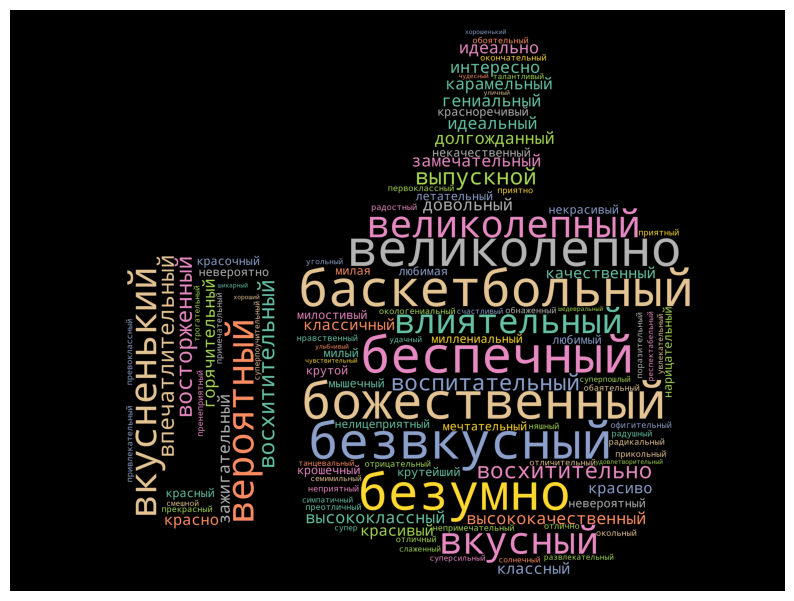

In [34]:
# Превращаем картинку в маску
#mask = np.array(Image.open('upvote.png'))
mask = np.array(Image.open('/content/drive/MyDrive/upvote.png'))

# Генерируем облако слов
wordcloud_adjg = WordCloud(width = 2000,
                      height = 1500,
                      background_color='black',
                      colormap='Set2',
                      mask=mask).generate(', '.join(forwdcldadj_g))

plt.figure(figsize=(10, 10)) # Устанавливаем размер картинки
plt.imshow(wordcloud_adjg) # Что изображаем
plt.axis("off") # Без подписей на осях
plt.show() # показать изображение

In [32]:
wordcloud_adjg.to_file('adjg_cloud.png') # сохраним картинку